# Rainbow- Combining Improvements in Deep Reinforcement Learning

### Import classes from files

In [1]:
from dqn import DQN
from ddqn import DDQN
from noisy import Noisy
from multi_step import MultiStep
from prioritized import Prioritized
from rainbow import Rainbow

import model
from config import Config

import gym
import matplotlib.pyplot as plt

Initialize our config object, set en empty list of agents (which will be filled later) and set the number of iterations.

In [2]:
conf = Config()
agents = []
nb_episode = 50

## DQN

In [3]:
env_id = "CartPole-v0"
env = gym.make(env_id)
env._max_episode_steps = 40000

In [4]:
model1 = model.model_basic(
    input_shape=env.observation_space.shape[0], output_shape=env.action_space.n)
target_model = model.model_basic(
    input_shape=env.observation_space.shape[0], output_shape=env.action_space.n)

In [5]:
dqn = DQN(env=env, model=model1, target_model=target_model, config=conf)
agents.append(dqn)

In [6]:
dqn.train(nb_episode=nb_episode)

# Extensions to Deep Q-Network

## DDQN

In [7]:
env_id = "CartPole-v0"
env = gym.make(env_id)
env._max_episode_steps = 40000

In [8]:
model1 = model.model_basic(
    input_shape=env.observation_space.shape[0], output_shape=env.action_space.n)
target_model = model.model_basic(
    input_shape=env.observation_space.shape[0], output_shape=env.action_space.n)

In [9]:
ddqn = DDQN(env=env, model=model1, target_model=target_model, config=conf)
agents.append(ddqn)

In [10]:
ddqn.train(nb_episode=nb_episode)

## Noisy-nets

In [11]:
env_id = "CartPole-v0"
env = gym.make(env_id)
env._max_episode_steps = 40000

In [12]:
model1 = model.ModelNoisy(
    input_shape=env.observation_space.shape[0], output_shape=env.action_space.n)
target_model = model.ModelNoisy(
    input_shape=env.observation_space.shape[0], output_shape=env.action_space.n)

In [13]:
noisy = Noisy(env=env, model=model1, target_model=target_model, config=conf)
agents.append(noisy)

In [14]:
noisy.train(nb_episode=nb_episode)

## Multi-step learning

In [15]:
env_id = "CartPole-v0"
env = gym.make(env_id)
env._max_episode_steps = 40000

In [16]:
model1 = model.model_basic(
    input_shape=env.observation_space.shape[0], output_shape=env.action_space.n)
target_model = model.model_basic(
    input_shape=env.observation_space.shape[0], output_shape=env.action_space.n)

In [17]:
multi_step = MultiStep(env=env, model=model1,
                       target_model=target_model, config=conf)
agents.append(multi_step)

In [18]:
multi_step.train(nb_episode=nb_episode)

## Prioritized Experience Replay

In [19]:
env_id = "CartPole-v0"
env = gym.make(env_id)
env._max_episode_steps = 40000

In [20]:
model1 = model.model_basic(
    input_shape=env.observation_space.shape[0], output_shape=env.action_space.n)
target_model = model.model_basic(
    input_shape=env.observation_space.shape[0], output_shape=env.action_space.n)

In [21]:
prioritized = Prioritized(env=env, model=model1,
                          target_model=target_model, config=conf)
agents.append(prioritized)

In [22]:
prioritized.train(nb_episode=nb_episode)

## Dueling Networks

In [23]:
env_id = "CartPole-v0"
env = gym.make(env_id)
env._max_episode_steps = 40000

In [24]:
model1 = model.ModelDuelings(
    input_shape=env.observation_space.shape[0], output_shape=env.action_space.n)
target_model = model.ModelDuelings(
    input_shape=env.observation_space.shape[0], output_shape=env.action_space.n)

In [25]:
duelings = DQN(env=env, model=model1, target_model=target_model,
               config=conf, name_agent='dueling')
agents.append(duelings)

In [26]:
duelings.train(nb_episode=nb_episode)

# Rainbow

In [27]:
env_id = "CartPole-v0"
env = gym.make(env_id)
env._max_episode_steps = 40000

In [28]:
model1 = model.ModelRainbow(
    input_shape=env.observation_space.shape[0], output_shape=env.action_space.n, nb_atoms=51)
target_model = model.ModelRainbow(
    input_shape=env.observation_space.shape[0], output_shape=env.action_space.n, nb_atoms=51)

In [29]:
rainbow = Rainbow(env=env, model=model1, target_model=target_model, config=conf)
# agents.append(rainbow)

In [30]:
rainbow.train(nb_episode=nb_episode)

# Comparison of the models

We define a function to plot the evolution of the rewards of the models. Function are smoothed with a moving average over 25 points for the sake of readability.

In [41]:
from scipy.signal import savgol_filter
import numpy as np

fontsize = 18
params = {'axes.labelsize': fontsize,
          'font.size': fontsize,
          'legend.fontsize': fontsize - 3,
          'axes.titlesize': fontsize + 4,
          'xtick.labelsize': fontsize,
          'ytick.labelsize': fontsize}
plt.rcParams.update(params)

def smooth(x,window_len=20,window='hanning'): 
    s=np.r_[x[window_len-1:0:-1],x,x[-1:-window_len:-1]]
    w=np.ones(window_len,'d')
    y=np.convolve(w/w.sum(),s,mode='valid')
    
    return y 

def plot_reward(agent):
    plt.figure(figsize=(12, 6))
    for i in range(len(agent)):
        plt.plot(smooth(agent[i].rewards), label=agent[i].name_agent)
    plt.legend()
    plt.ylim((0,400))
    plt.xlim((0,700))
    plt.xlabel('episodes')
    plt.ylabel('rewards')
    plt.show()

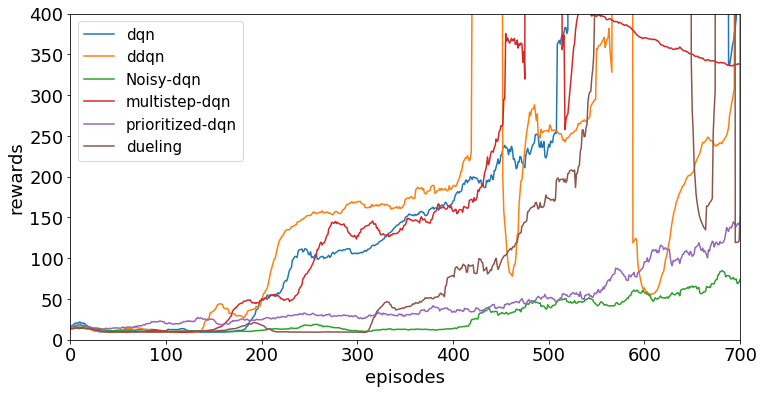

In [42]:
plot_reward(agents)